## Sprint ゲート付きリカレントニューラルネットワーク

### 1.このSprintについて


#### Sprintの目的
発展的なRNNの手法を理解する
ドキュメントを網羅的に読む

#### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。


### 2.KerasのRecurrentレイヤー


Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれらすべてを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

Recurrentレイヤー - Keras Documentation

#### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

#### LSTMのサンプルコード

[keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet](https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/imdb_lstm.py)

#### ConvLSTM2Dのサンプルコード

[keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet](https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。すべて実行する上での実行時間を考慮した数に設定してください。

In [77]:
import tensorflow as tf

In [78]:
from __future__ import print_function


from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM,SimpleRNN,GRU,Conv3D,ConvLSTM2D,BatchNormalization,RNN,SimpleRNNCell,AbstractRNNCell
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K

In [69]:
max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train[:2500], y_train[:2500],
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test[:200], y_test[:200]))
score, acc = model.evaluate(x_test[:200], y_test[:200],
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
7/7 [==============================] - 1s 125ms/step - loss: 0.6816 - accuracy: 0.5950
Test score: 0.6815853118896484
Test accuracy: 0.5950000286102295


In [7]:
max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/a100/.pyenv/versions/anaconda3-5.1.0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/a100/.pyenv/versions/anaconda3-5.1.0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wit

In [71]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, None, 128)         25600     
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________


In [72]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train[:2500], y_train[:2500],
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test[:200], y_test[:200]))
score, acc = model.evaluate(x_test[:200], y_test[:200],
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
7/7 [==============================] - 1s 69ms/step - loss: 0.7007 - accuracy: 0.4450
Test score: 0.7006544470787048
Test accuracy: 0.4449999928474426


In [73]:
max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [74]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, None, 128)         25600     
_________________________________________________________________
gru_7 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 124,801
Trainable params: 124,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train[:2500], y_train[:2500],
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test[:200], y_test[:200]))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
782/782 [==============================] - 61s 78ms/step - loss: 0.6932 - accuracy: 0.5000
Test score: 0.6931667327880859
Test accuracy: 0.5


In [91]:
df = [['16s 178ms/step','0.444'],['46s 530ms/step','0.595'],['29s 321ms/step','0.5']]

In [92]:
pd.DataFrame(df,index=['simpleRNN','LSTM','GRU'],columns=['train_time','test_acc'])


,train_time,test_acc
simpleRNN,16s 178ms/step,0.444
LSTM,46s 530ms/step,0.595
GRU,29s 321ms/step,0.5


 比較した結果上記の通りになった

In [82]:
import pandas as pd

In [3]:
import numpy as np
import pylab as plt
from tensorflow.keras import backend as K


In [18]:

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')




In [19]:
seq.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_8 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_9 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_10 (ConvLSTM2D) (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_10 (Batc (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_11 (ConvLSTM2D) (None, None, 40, 40, 40) 

In [79]:
def generate_movies(n_samples=120, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [80]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=120)
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,
        epochs=3, validation_split=0.5)

Epoch 1/3
5/5 [==============================] - 909s 202s/step - loss: 0.8035 - val_loss: 0.6929
Epoch 2/3
5/5 [==============================] - 1040s 211s/step - loss: 0.8032 - val_loss: 0.6928
Epoch 3/3
5/5 [==============================] - 1105s 222s/step - loss: 0.8028 - val_loss: 0.6926


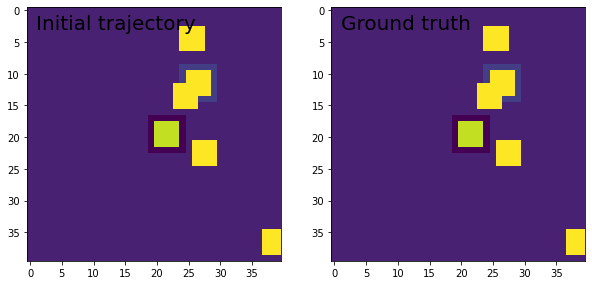

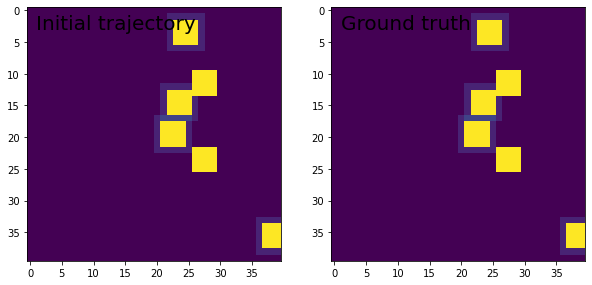

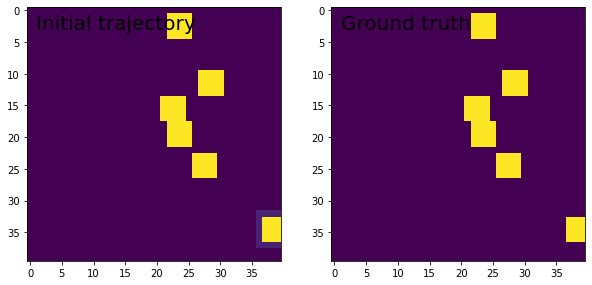

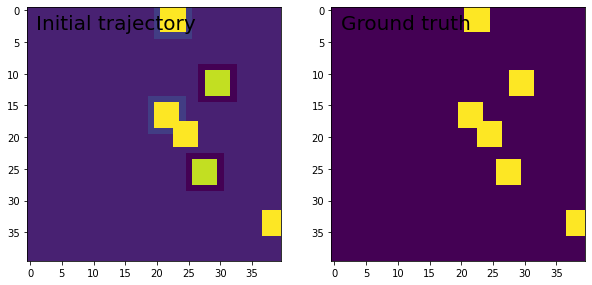

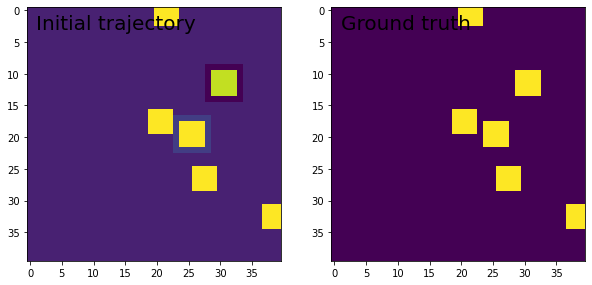

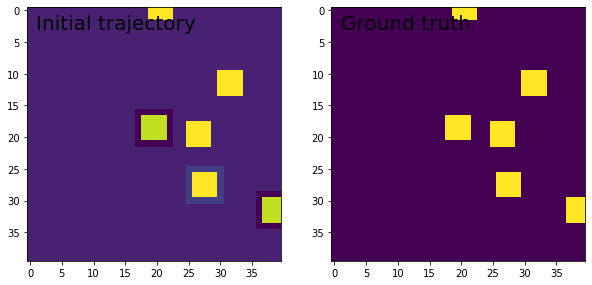

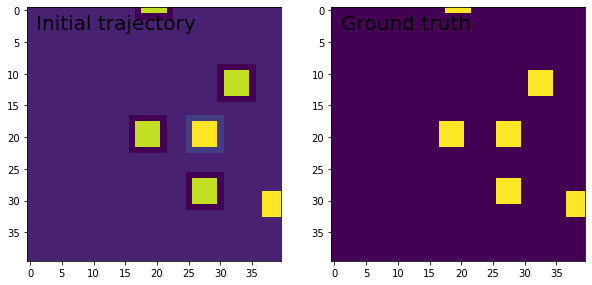

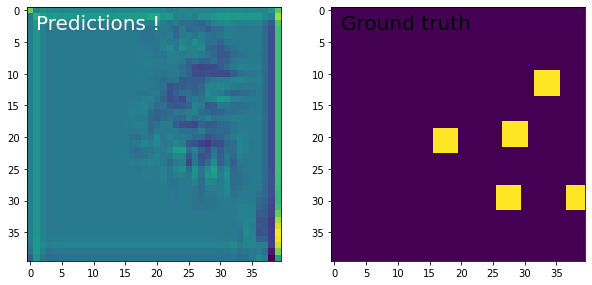

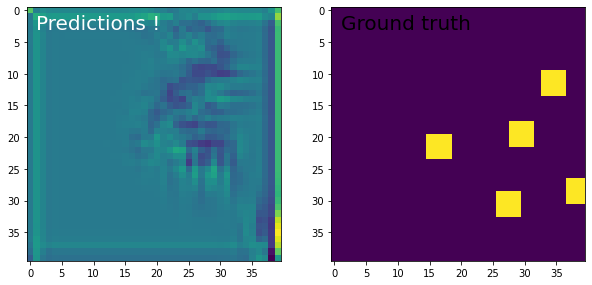

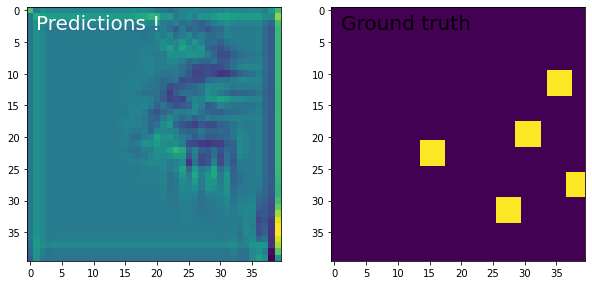

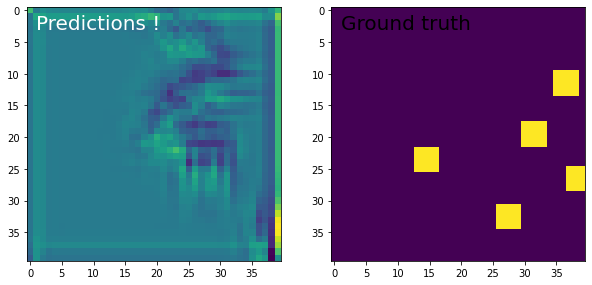

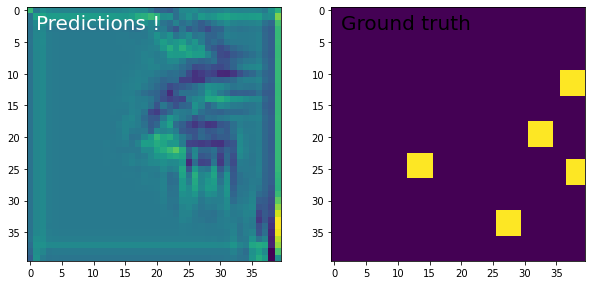

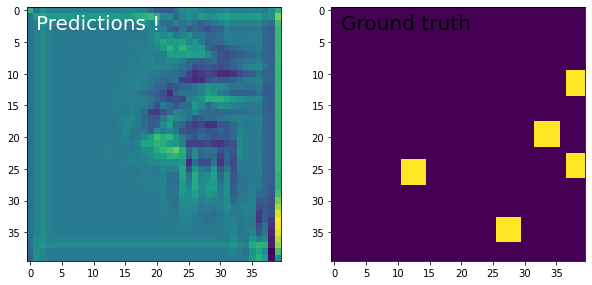

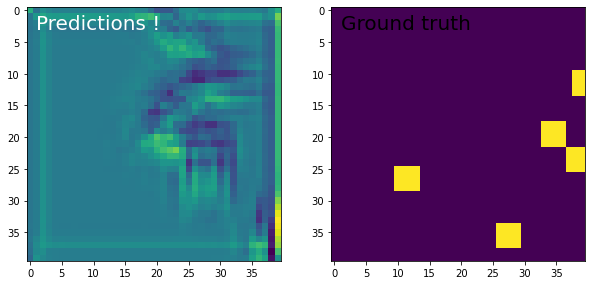

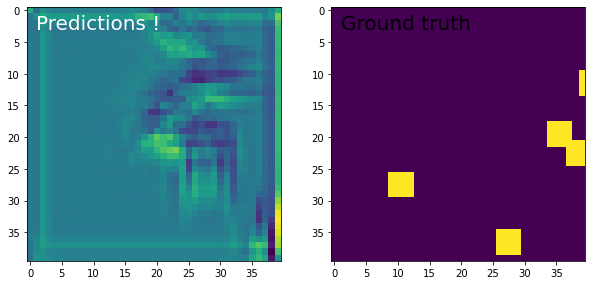

In [81]:

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 104
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

#### 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

データセット - Keras Documentation

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

####【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- GRU  
    - ゲートのあるリカレントユニット - Cho et al. 2014.  

- RNN  
    - Recurrentレイヤーに対する基底クラス．  
    - keras.layers.RNN(cell)

    #### SimpleRNNCell で単一のサンプルに対する操作（セル）を定義し、それを RNN() で囲むことによってバッチを処理するレイヤーを定義しています。

    #### 言い換えれば、SimpleRNNCell に相当するサンプル単位の処理を自分で定義して RNN() で囲むことにより、好きな構造のRNNを定義できるはずです。

- SimpleRNNCell  
    - 出力が入力にフィードバックされる全結合RNN．  


- SimpleRNNCell  
    - SimpleRNNのCellクラス．

- GRUCell  
    - GRUレイヤーのためのCellクラス．

- LSTMCell  
    - 長短期記憶ユニット - Hochreiter 1997.  


- ConvLSTM2D  
    - 畳み込みLSTM．  
    - LSTMレイヤーに似ていますが，入力の変換とリカレントな変換が畳み込みです．  


- StackedRNNCells  
    - RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．
    - 効率的なstacked RNNを実装するために使われます．




- CuDNNGRU  
    - CuDNNを利用した高速なGRU実装．
    - TensorFlowバックエンドでGPU上でのみ動作します．


- CuDNNLSTM
    - CuDNNを利用した高速なLSTM実装．
    - TensorFlowバックエンドでGPU上でのみ動作します．

    - ##パフォーマンスの最適化とCuDNNカーネル
TensorFlow 2.0では、組み込みのLSTMレイヤーとGRUレイヤーが更新され、GPUが使用可能な場合にデフォルトでCuDNNカーネルを活用するようになりました。この変更により、以前のkeras.layers.CuDNNLSTM/CuDNNGRUレイヤーは非推奨になり、実行するハードウェアを気にせずにモデルを構築できます。




In [40]:
max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(RNN(SimpleRNNCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
rnn (RNN)                    (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________


In [69]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(tf.keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(128)
x = tf.keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)


In [55]:
max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/a100/.pyenv/versions/anaconda3-5.1.0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/a100/.pyenv/versions/anaconda3-5.1.0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wit

In [56]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
rnn_7 (RNN)                  (None, 128)               17024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


In [52]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train[:2500], y_train[:2500],
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test[:200], y_test[:200]))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
782/782 [==============================] - 27s 35ms/step - loss: 0.6889 - accuracy: 0.5323
Test score: 0.6888620257377625
Test accuracy: 0.5323200225830078
